In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [41]:
data = "data/Titanic-Dataset.csv"
df = pd.read_csv(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Categorical Data Analysis: Passenger Class

In [44]:
df["Pclass"].value_counts(dropna = False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [45]:
df[["Pclass", "Survived"]].groupby("Pclass", as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

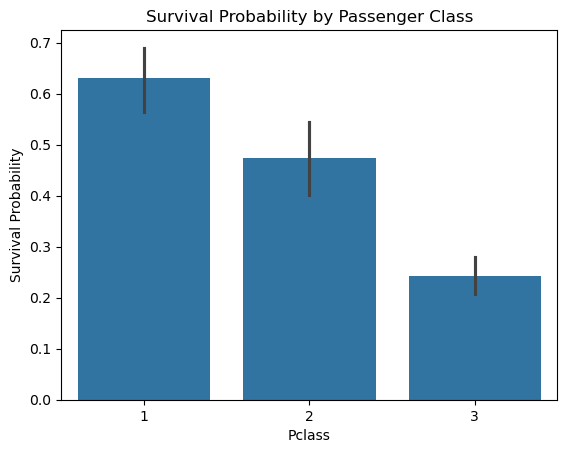

In [46]:
sns.barplot(x = "Pclass", y = "Survived", data = df)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger Class")

The graph indicates that a higher number of first-class passengers survived compared to passengers in other classes.

# Categorical data analysis: Sex

In [47]:
df["Sex"].value_counts(dropna = False)

Sex
male      577
female    314
Name: count, dtype: int64

In [48]:
df[["Sex", "Survived"]].groupby("Sex", as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability By Gender')

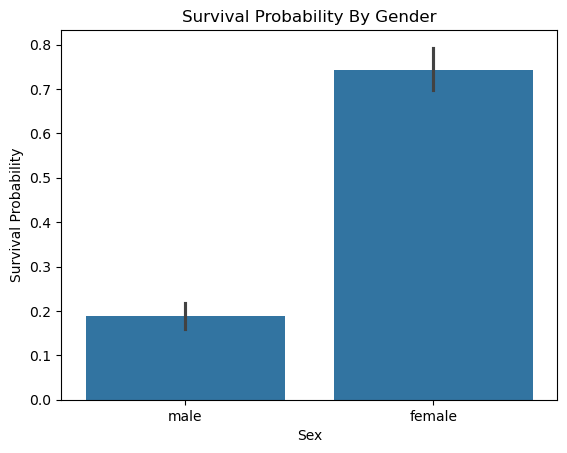

In [49]:
sns.barplot(x = "Sex", y = "Survived", data = df)
plt.ylabel("Survival Probability")
plt.title("Survival Probability By Gender")

More female passengers survived, as the priority was given to rescuing women and children first.

# Categorical data analysis: Embarked

In [50]:
df["Embarked"].value_counts(dropna = False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [51]:
df[["Embarked", "Survived"]].groupby("Embarked", as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0, 0.5, 'Survival Probabilty')

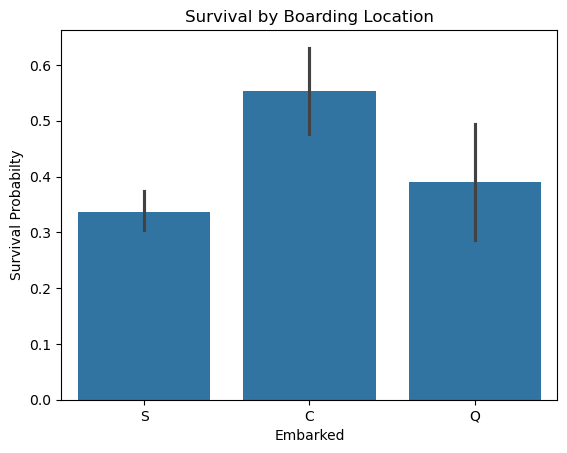

In [52]:
sns.barplot(x = "Embarked", y = "Survived", data = df)
plt.title("Survival by Boarding Location")
plt.ylabel("Survival Probabilty")

Passengers who embarked from location C appear to have had a higher probability of survival. This trend needs further investigation.

# Relation Between The Categorical Data: Sex and Passsenger Class

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

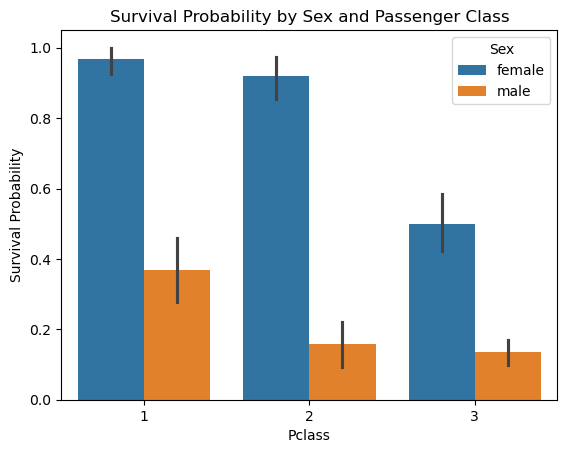

In [53]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = df)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Sex and Passenger Class")

Across all classes, females had a higher survival rate, which is an expected outcome.

# Relation Between The Categorical Data: Emabarking Location and Passsenger Class

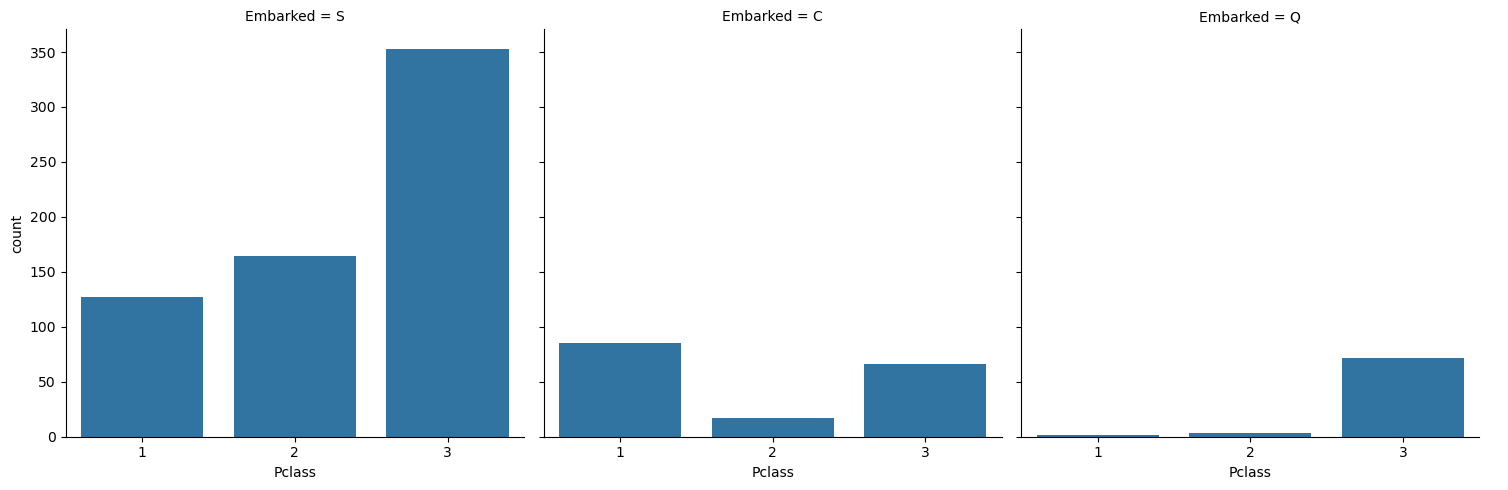

In [54]:
sns.catplot(x = "Pclass", col = "Embarked", data = df, kind = "count")
plt.show()

The graph indicates that a greater number of third-class passengers embarked from location S. This helps explain why passengers from location C had a higher survival rate, as there was a relatively greater proportion of first-class passengers among them.

# Outliers in Numerical Data

Outliers in numerical data can skew summary statistics, distort visualizations, and mislead insights during Exploratory Data Analysis (EDA). They can heavily influence the mean and standard deviation, making trends difficult to interpret. Thus we must remove them before proceeding to analysis.

For this case, Interquartile Range(IQR) method is used to detect and remove outlies.  IQR focuses on the middle 50% of the data (between Quartile-1 and Quartile-3) and considers values beyond 1.5×IQR as potential outliers.

In [55]:
# This function loops through the columns specified and detects outliers based the IQR method.
# The outlier step is specified as "iqr * 1.5"
# If values are below the Quartile-1 minus outlier step value or exceed the Quartile-3 plus outlier step value, they are define as outliers.
# The outliers index is recorded and if it exceeds n times the index will be returned. This will prevent the removal of random ouliers that appear in only one column.

def det_outliers(df, columns, n):
    outliers = []
    for col in columns:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        low_out = q1 - iqr * 1.5
        up_out = q3 + iqr * 1.5
        for index, val in df[col].items():
            if val < low_out or val > up_out:
                outliers.append(index)
    outliers = Counter(outliers)
    outers = list(key for key, value in outliers.items() if value > n)
    return outers

In [56]:
# Remove outliers using the det_outliers function

outliers = det_outliers(df, ["Age", "SibSp", "Parch", "Fare"], 2)
df = df.drop(outliers, axis = 0).reset_index(drop=True)

# Numerical Data Analysis : Age

In [57]:
df["Age"].value_counts(dropna = False)

Age
NaN      170
24.00     29
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

Text(0.5, 1.0, 'Passenger Age Distribution')

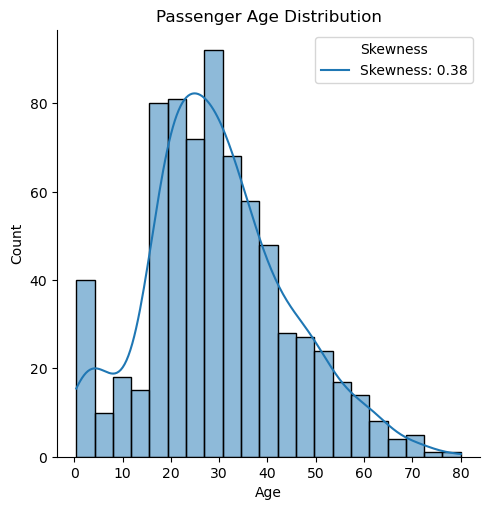

In [58]:
sns.displot(df["Age"], label = "Skewness: %.2f" % df["Age"].skew() ,kde = True)
plt.legend(title = "Skewness", labels = ["Skewness: %.2f" % df["Age"].skew()])
plt.title("Passenger Age Distribution")

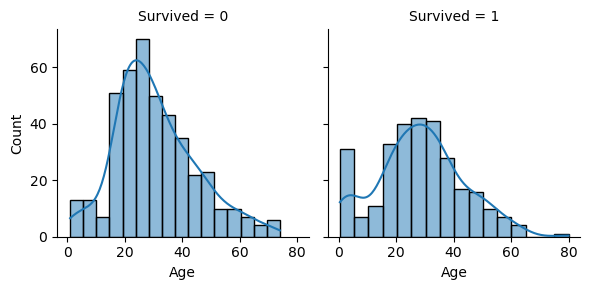

In [59]:
g = sns.FacetGrid(df, col = 'Survived')
g.map(sns.histplot, 'Age', kde = True)

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

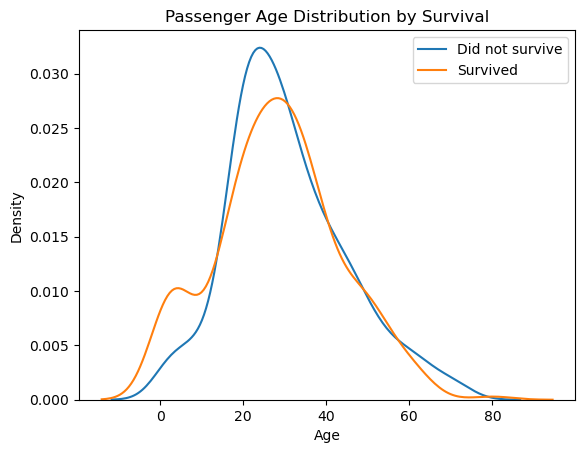

In [60]:
sns.kdeplot(df["Age"][df["Survived"] == 0], label = "Did not survive")
sns.kdeplot(df["Age"][df["Survived"] == 1], label = "Survived")
plt.xlabel("Age")
plt.legend()
plt.title("Passenger Age Distribution by Survival")

# Numerical Data Analysis : SibSp

In [61]:
df["SibSp"].value_counts(dropna = False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [62]:
df[["SibSp", "Survived"]].groupby("SibSp", as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.153846
4,4,0.166667
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

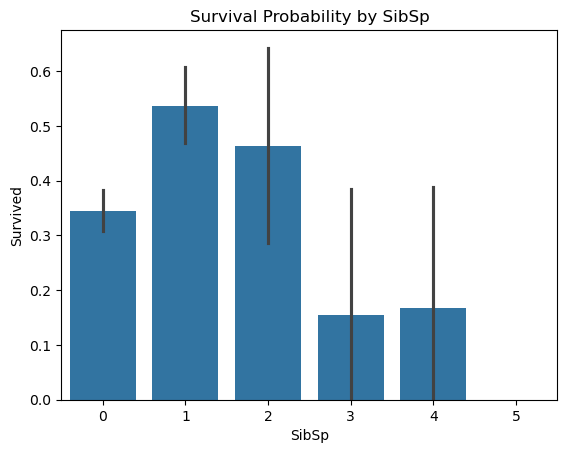

In [63]:
sns.barplot(x = "SibSp", y = "Survived", data = df)
plt.xlabel("SibSp")
plt.ylabel("Survived")
plt.title('Survival Probability by SibSp')

# Numerical Data Analysis : Parch

In [64]:
df[["Parch", "Survived"]].groupby("Parch", as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.542857
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

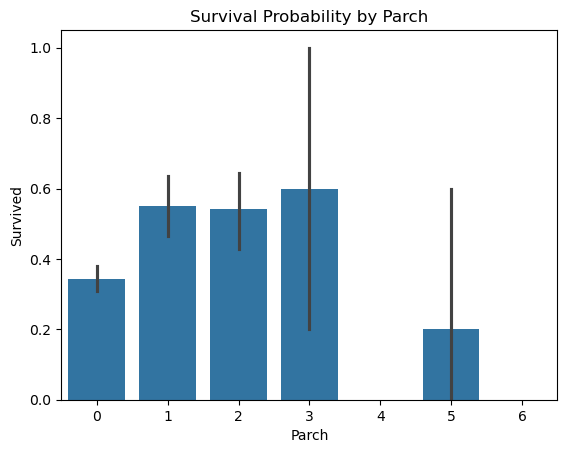

In [65]:
sns.barplot(x = "Parch", y = "Survived", data = df)
plt.xlabel("Parch")
plt.ylabel("Survived")
plt.title('Survival Probability by Parch')

# Numerical Data Analysis : Fare

In [66]:
df[["Fare", "Survived"]].groupby("Fare", as_index = False).mean()

,Fare,Survived
0,0.0000,0.066667
1,4.0125,0.000000
2,5.0000,0.000000
3,6.2375,0.000000
4,6.4375,0.000000
...,...,...
242,227.5250,0.750000
243,247.5208,0.500000
244,262.3750,1.000000
245,263.0000,0.000000


Text(0.5, 1.0, 'Survival Probability by Fare')

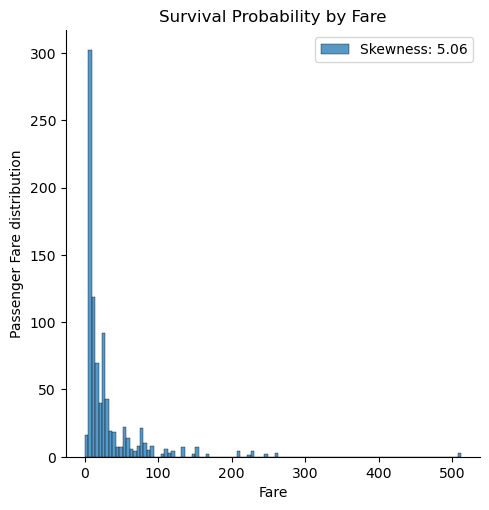

In [67]:
sns.displot(df["Fare"], label = 'Skewness: %.2f'%(df['Fare'].skew()))
plt.xlabel("Fare")
plt.legend(loc='best')
plt.ylabel("Passenger Fare distribution")
plt.title('Survival Probability by Fare')

The passsenger fare distribution has high skewness which has various impacts on ML models' perfomance. It must be transformed to capture better relation within the data.

#  Numerical Data Analysis : Numeraical Data correlation with Survival

<Axes: >

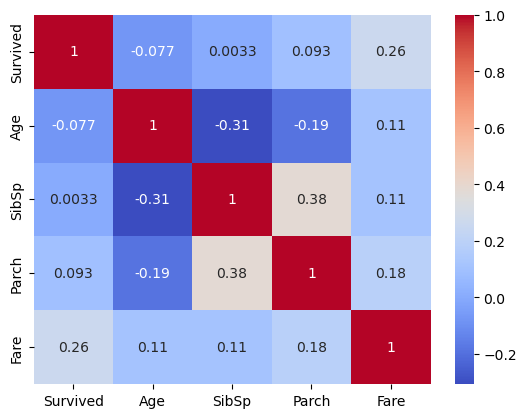

In [68]:
sns.heatmap(df[["Survived", "Age", "SibSp", "Parch", "Fare"]].corr(), annot = True, cmap = "coolwarm")